Student Details

Name: **Abhijit Sinha**

ID: **18195067**

You may add two extra libraries: one to make a train-test split and one to perform a grid search

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import math

from sklearn.model_selection import train_test_split, GridSearchCV #, RandomizedSearchCV 

np.random.seed(5)

# Task 4
**[Task]:** Perform classification on dataset_1 using an SVM with linear kernel and experiment with the C-parameter to find the widest margin solution with a hard margin and a soft margin. 

**[Rubric]:** 
- Two plots for suitable values of the C-parameter showing the difference between a soft- and hard-margin SVM. 
- Numerical data with explanation to support the conclusions drawn from the graphs.


**[Learning]:** This task provides an insight in how SVM’s try to find a hyperplane (which in two dimensions is a line) which divides two classes with the maximum margin on either side of the hyperplane. You can use the C-parameter as a form of regularization; with this parameter you can allow the SVM to miss-classify certain points to allow a wider margin and thus, hopefully, a better performance out-of-sample.

### Read dataset 1

In [2]:
# Open the dataset_1 csv  file and import data
with open("dataset_1.csv" , 'r') as f1:
    first_line = f1.readline()
    data1 = np.loadtxt(fname=f1, delimiter=',')

print(data1.shape)

# Print the 1st 5 rows
data1[0:5,:]

(10001, 4)


array([[ 0.        , -0.33198235, -0.92602938,  1.        ],
       [ 1.        , -0.81931045, -0.24236803,  0.        ],
       [ 2.        ,  0.92242739,  0.49908768,  1.        ],
       [ 3.        , -0.5707929 ,  0.56228627,  0.        ],
       [ 4.        ,  0.3758172 , -0.94116546,  1.        ]])

In [3]:
# Target class stored in y
y1 = data1[:,-1]

# Input samples stored in X
X1 = data1[:,1:3]

print(X1.shape, y1.shape)

(10001, 2) (10001,)


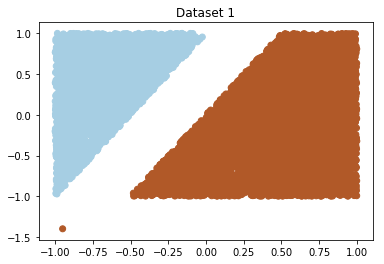

In [4]:
plt.figure()
plt.scatter(X1[:,0], X1[:,1], c=y1, cmap=plt.cm.Paired)
plt.title('Dataset 1')
plt.show()

In [5]:
# Function to plot the decision boundary

def plot_decision_boundary(X_train, y_train, classifier, label=''):
    # Sample code to plot SVM margin, 'gutters' and support vectors
    
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    ax.set_aspect(aspect=1)
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = classifier.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(classifier.support_vectors_[:, 0], classifier.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='b')
    plt.title("SVM decision boundary: " + label)
    

In [6]:
# Split the data into train and test set
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, shuffle=True, stratify=y1, random_state=5)

print(X1_train.shape, X1_test.shape, y1_train.shape, y1_test.shape)

(8000, 2) (2001, 2) (8000,) (2001,)


C: 0.01	 CV score:0.999875	 Test score:1.0
C: 0.1	 CV score:0.999875	 Test score:1.0
C: 1	 CV score:0.999875	 Test score:1.0
C: 10	 CV score:1.0	 Test score:1.0
C: 100	 CV score:1.0	 Test score:1.0


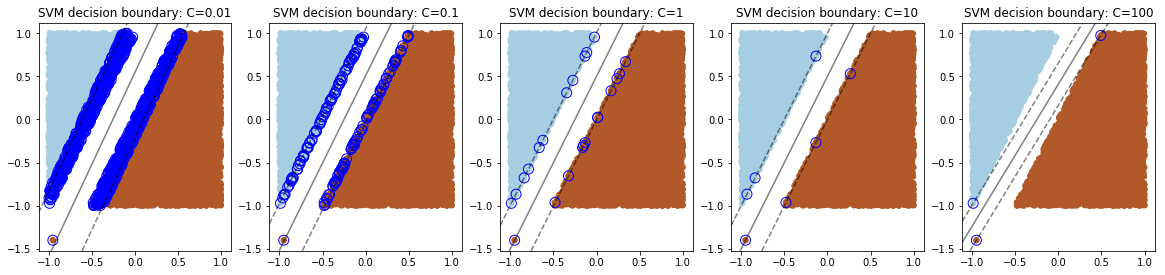

In [7]:
# Select a range of C values
C_values = [0.01, 0.1, 1, 10, 100]

# Using a SVM classifier
SVM_clf = svm.SVC()

# Add a figure for plotting the decision boundarys in subplots
f = plt.figure(figsize=(20,20))
# Loop to get the effect of C on dataset 1
for idx, c_val in enumerate(C_values):   
    # Set the hyperparameters and select a range of C values
    hyper_parameters = {'C': [c_val], 'kernel': ['linear']}

    # Using 10 fold cross-validation in grid search
    clf = GridSearchCV(SVM_clf, hyper_parameters, cv=10, scoring='accuracy', n_jobs=-1)
    clf.fit(X1_train, y1_train)
    ax = f.add_subplot(1,len(C_values),idx+1)
    plot_decision_boundary(X1_train, y1_train, clf.best_estimator_, label='C={}'.format(c_val))

    y_pred = clf.best_estimator_.predict(X1_test)
    score = clf.best_estimator_.score(X1_test, y1_test)
    print("C: {}\t CV score:{}\t Test score:{}".format(c_val, clf.best_score_, score))


## Observations:
The C parameter tells the SVM optimization how much you want to avoid misclassifying each training example. By choosing C appropriately we can get a large margin hyperplane with a small amount of margin violation. This also will lead to a small VC dimension

##### Hard Margin for Large C
When the penalty parameter C is large, we move towards violating the margin which gets us closer to hard margin SVM. A large can also lead to the over-fitting problem. For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly.


##### Soft Margin for Small C
Small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C we can see there are some miss-classification. When C is small, we move towards soft margin and care less about violating the margin. 

References: https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel

# Task 5
**[Task]:** Explore the provided data sets (dataset_1, dataset_2 and dataset_3) using Support Vector Machines and choose suitable kernels and hyper-parameters.

**[Rubric]:** 
- Suitable kernels and hyper parameters  proposed for all datasets. 
- Proper use of train and test data and plots of the SVM hyperplane. 
- Evidence of a structured approach to the selection of hyper-parameters.

**[Learning]:** This task provides an insight in how a kernel can allow the SVM (a linear classifier) to be used on non-linearly separable data sets by casting the data in some higher dimensional space as determined by the kernel you choose. In addition to choosing a suitable kernel, you will find that tuning the hyper-parameters of the SVM is important. Take some time to explore various kernels and values of the hyper-parameters to get a feel for how they affect performance and then use a structured approach to arrive at your final conclusions. Take into consideration the out-of-sample error (simulated and based on theory (see lecture 14 from Learning from Data)). 

For this task you may import two extra libraries: one to create train-test splits and one to perform a grid search of your choosing.

### Read dataset 2

In [8]:
# Open the dataset_2 csv file and save in data2
with open("dataset_2.csv" , 'r') as f2:
    first_line = f2.readline()
    data2 = np.loadtxt(fname=f2, delimiter=',')

print(data2.shape)
# Print the 1st 5 rows
data2[0:5,:]

(10000, 4)


array([[ 0.        ,  0.79931474,  0.2192753 ,  0.        ],
       [ 1.        , -0.73161542, -0.40362673,  1.        ],
       [ 2.        ,  0.42446018,  0.13860711,  0.        ],
       [ 3.        ,  0.58665414, -0.18770831,  0.        ],
       [ 4.        ,  0.83249324,  0.24185973,  0.        ]])

(10000, 2) (10000,)


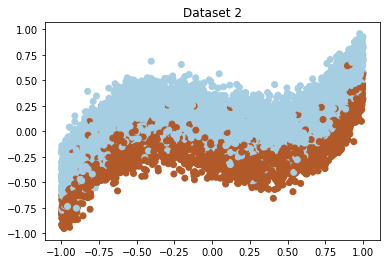

In [9]:
# Target class stored in y2
y2 = data2[:,-1]
# Input samples stored in X2
X2 = data2[:,1:3]

print(X2.shape, y2.shape)
plt.figure()
plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=plt.cm.Paired)
plt.title('Dataset 2')
plt.show()

### Read dataset 3

In [10]:
# Open the dataset_3 csv file and save in data3
with open("dataset_3.csv" , 'r') as f3:
    first_line = f3.readline()
    data3 = np.loadtxt(fname=f3, delimiter=',')
    
print(data3.shape)
# Print the 1st 5 rows
data3[0:5,:]

(10000, 4)


array([[ 0.        , -0.53278593,  0.6614533 ,  1.        ],
       [ 1.        , -0.50086626,  0.69558708,  1.        ],
       [ 2.        , -0.69704647, -0.11641922,  1.        ],
       [ 3.        ,  0.55701053,  0.33243574,  1.        ],
       [ 4.        , -0.01273783,  0.85823181,  1.        ]])

(10000, 2) (10000,)


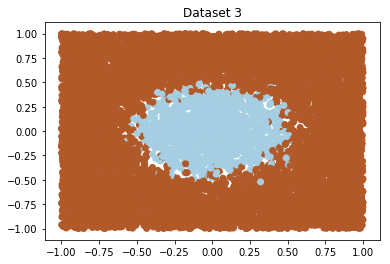

In [11]:
# Target class stored in y3
y3 = data3[:,-1]
# Input samples stored in X3
X3 = data3[:,1:3]

print(X3.shape, y3.shape)
plt.figure()
plt.scatter(X3[:,0], X3[:,1], c=y3, cmap=plt.cm.Paired)
plt.title('Dataset 3')
plt.show()

### Shuffle and Split dataset 2 and 3 into training and test set

In [12]:
# Split the data into train and test set
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, shuffle=True, stratify=y2, random_state=5)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, shuffle=True, stratify=y3, random_state=5)

print(X2_train.shape, X2_test.shape, y2_train.shape, y2_test.shape)
print(X3_train.shape, X3_test.shape, y3_train.shape, y3_test.shape)

(8000, 2) (2000, 2) (8000,) (2000,)
(8000, 2) (2000, 2) (8000,) (2000,)


In [13]:
# Function to optimize SVM classfier for multiple datasets

def optimize_SVM(X_train, y_train, X_test, y_test, title=''):
    
    # Set the hyperparameters and select a range of C values and kernels
    hyper_parameters = {'C':[0.01, 0.1, 1, 10, 100],
                        'gamma':  ['scale'], 
                        'kernel': ['linear', 'rbf', 'sigmoid'],    #'poly' kernel takes a lot of time
                        #'degree': [1, 2, 3, 4, 5],   # used only by Poly kernel
                       }

    # Using a SVM classifier
    SVM_clf = svm.SVC()

    # Using 10 fold cross-validation in grid search
    clf = GridSearchCV(SVM_clf, hyper_parameters, cv=10, scoring='accuracy', n_jobs=-1)
    clf.fit(X_train, y_train)
    plot_decision_boundary(X_train, y_train, clf.best_estimator_, label=title)
    
    y_pred = clf.best_estimator_.predict(X_test)
    score = clf.best_estimator_.score(X_test, y_test)
    
    print("Best SVM classifier parameters:\n", clf.best_params_)
    print("Best CV score :", clf.best_score_)
    print("Test data score", score)

Best SVM classifier parameters:
 {'C': 0.01, 'gamma': 'scale', 'kernel': 'sigmoid'}
Best CV score : 1.0
Test data score 1.0


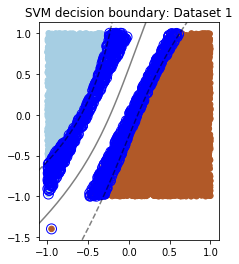

In [14]:
optimize_SVM(X1_train, y1_train, X1_test, y1_test, title='Dataset 1')

Best SVM classifier parameters:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score : 0.864875
Test data score 0.866


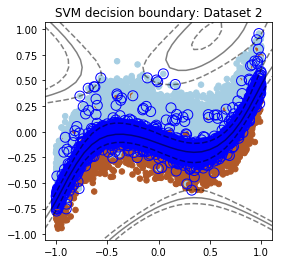

In [15]:
optimize_SVM(X2_train, y2_train, X2_test, y2_test, title='Dataset 2')

Best SVM classifier parameters:
 {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV score : 0.98775
Test data score 0.987


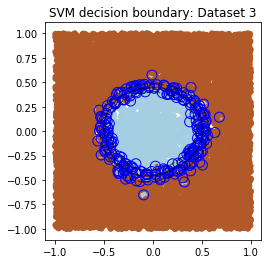

In [16]:
optimize_SVM(X3_train, y3_train, X3_test, y3_test, title='Dataset 3')

### Observations:

#### TODO